In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("./data/ozone.csv")
print("읽어들인 총데이터의 shape : {}".format(df.shape))
df.head()

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

읽어들인 총데이터의 shape : (153, 6)


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [2]:
df=df[["Ozone","Temp"]]

In [4]:
df=df.dropna(how="any",inplace= False)
print("결측치 제거한 후 남은 데이터 : {}".format(df.shape))

결측치 제거한 후 남은 데이터 : (116, 2)


{'whiskers': [<matplotlib.lines.Line2D at 0x213a02c3e80>,
 'caps': [<matplotlib.lines.Line2D at 0x213a02d6550>,
 'boxes': [<matplotlib.lines.Line2D at 0x213a02c3a90>],
 'medians': [<matplotlib.lines.Line2D at 0x213a02d6be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x213a02d6f28>],
 'means': []}

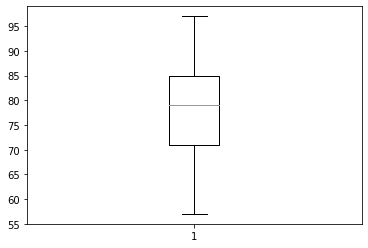

In [5]:
plt.boxplot(df["Temp"])

{'whiskers': [<matplotlib.lines.Line2D at 0x213a1347ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x213a1353208>,
 'boxes': [<matplotlib.lines.Line2D at 0x213a1347978>],
 'medians': [<matplotlib.lines.Line2D at 0x213a1353898>],
 'fliers': [<matplotlib.lines.Line2D at 0x213a1353be0>],
 'means': []}

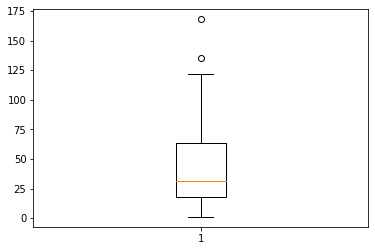

In [6]:
plt.boxplot(df["Ozone"])

In [ ]:
q1, q3=np.percentile(df["Ozone"], [25,75])
irq = q3-1
upper = q3 + irq *1.5
print(upper)
mask = df["Ozone"] >upper
df = df.loc[~mask]
print("이상치를 제거한 후 남은 데이터 : {}".format(df.shape))
df.head()

In [ ]:
q1,q3 = np.percentile(df["Ozone"],[25,75])
irq = q3-q1
upper = q3 + irq*1.5
print(upper)
mask= df["Ozone"]>upper
df = df.loc[~mask]
print(df.shape)

In [8]:
q1,q3=np.percentile(df["Ozone"],[25,75])
irq = q3-q1
upper = q3 + irq*1.5
mask = df["Ozone"]>upper
df = df.loc[~mask]
df.shape
print(df)

     Ozone  Temp
0     41.0    67
1     36.0    72
2     12.0    74
3     18.0    62
5     28.0    66
..     ...   ...
147   14.0    63
148   30.0    70
150   14.0    75
151   18.0    76
152   20.0    68

[114 rows x 2 columns]


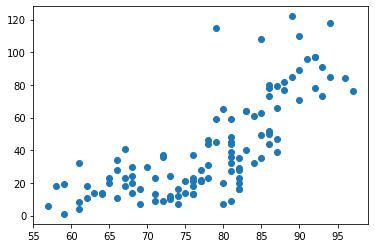

In [9]:
plt.scatter(df["Temp"],df["Ozone"])

In [12]:
x_data = df["Temp"]
y_data = df["Ozone"]

x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

H=W*x+b

cost = tf.reduce_mean(tf.square(H-y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

sess= tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_val = sess.run([train,cost],
                          feed_dict={x:x_data,
                                     y:y_data})
    if step % 300 ==0:
        print("cost값은 :{}".format(cost_val))

cost값은 :2907.07275390625
cost값은 :nan
cost값은 :nan
cost값은 :nan
cost값은 :nan
cost값은 :nan
cost값은 :nan
cost값은 :nan
cost값은 :nan
cost값은 :nan


In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _,cost_val=sess.run([train,cost],
                       feed_dict={x:x_data,
                                 y:y_data})
    if step % 300==0:
        print("cost값은: {}".format(cost_val))

cost값은: 47832.94921875
cost값은: 678.3587036132812
cost값은: 677.8374633789062
cost값은: 677.3170166015625
cost값은: 676.7975463867188
cost값은: 676.2789916992188
cost값은: 675.7612915039062
cost값은: 675.24462890625
cost값은: 674.7288208007812
cost값은: 674.2138671875
